Importing libraries and reading the data

In [2]:
#importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#read csv
netflix_df = pd.read_csv("netflix_data.csv")

#display first few rows of the DataFrame
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


Filter the data for Movies released in 1990s

In [4]:
#filter for movies released in 1990s
df_1990s = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999)]
#check 
df_1990s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
210,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
238,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
273,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


Find the most frequent movie Duration

In [14]:
most_frequent_duration = df_1990s['duration'].mode()[0]
#print the result
print(f"Most frequent movie duration in the 1990s: {most_frequent_duration} minutes")

Most frequent movie duration in the 1990s: 1 minutes


In [16]:
# Filter out unrealistic durations (less than 30 minutes)
df_1990s_filtered = df_1990s[df_1990s['duration'] >= 30]

# Calculate the most frequent duration from the filtered data
most_frequent_duration = df_1990s_filtered['duration'].mode()[0]

# Print the result
print(f"Most frequent movie duration in the 1990s (after filtering): {most_frequent_duration} minutes")



Most frequent movie duration in the 1990s (after filtering): 94 minutes


Visualize the distribution of duration

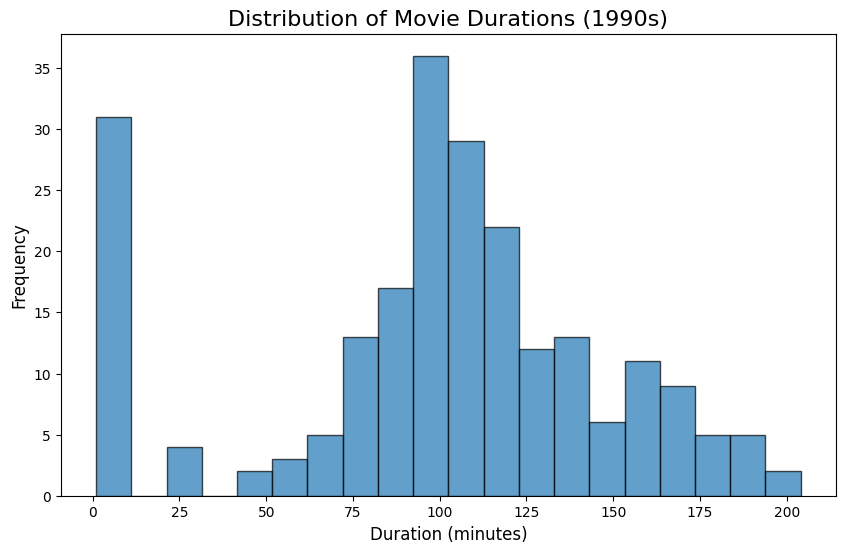

In [17]:
plt.figure(figsize=(10,6))
plt.hist(df_1990s['duration'], bins=20,  edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Durations (1990s)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Count the number of short action movies

In [18]:
#filter for action movies in 1990s
action_movies_1990s = df_1990s[df_1990s['genre'].str.contains('Action', case=False)]

#count the number of short action movies(duration<90 mins)
short_action_movies = action_movies_1990s[action_movies_1990s['duration']<90]
count_short_action_movies = short_action_movies.shape[0]

print(f"Number of short action movies (duration < 90 minutes): {count_short_action_movies}")

Number of short action movies (duration < 90 minutes): 10


Count the Movies with a Duration of 90 Minutes or Less

In [19]:
# Count the number of movies with a duration of 90 minutes or less
short_movies = df_1990s[df_1990s['duration'] <= 90]
count_short_movies = short_movies.shape[0]

print(f"Number of short movies (duration <= 90 minutes): {count_short_movies}")


Number of short movies (duration <= 90 minutes): 73


Visualizing the Genre Distribution of Movies

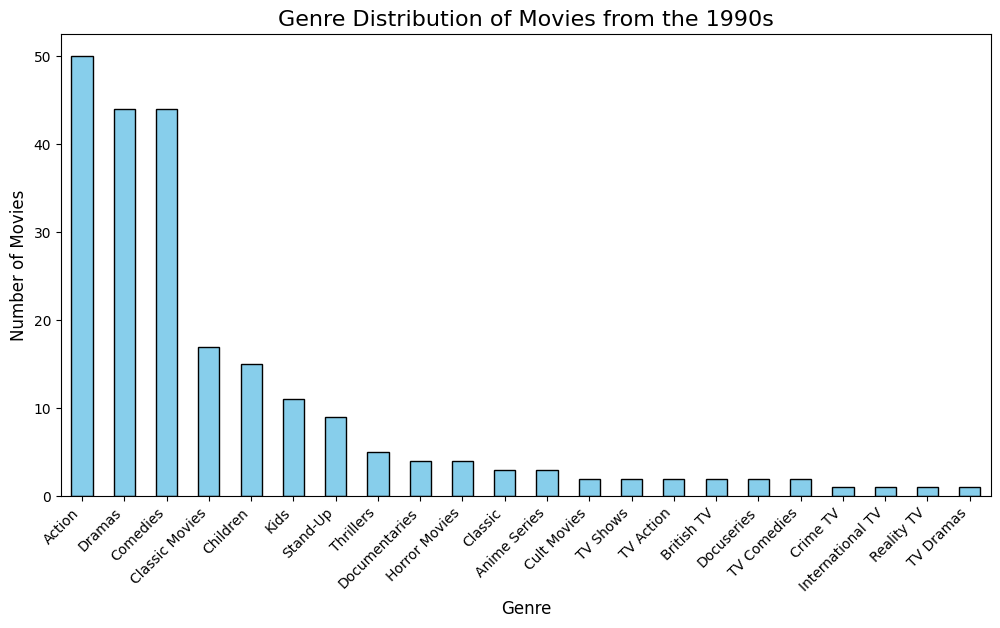

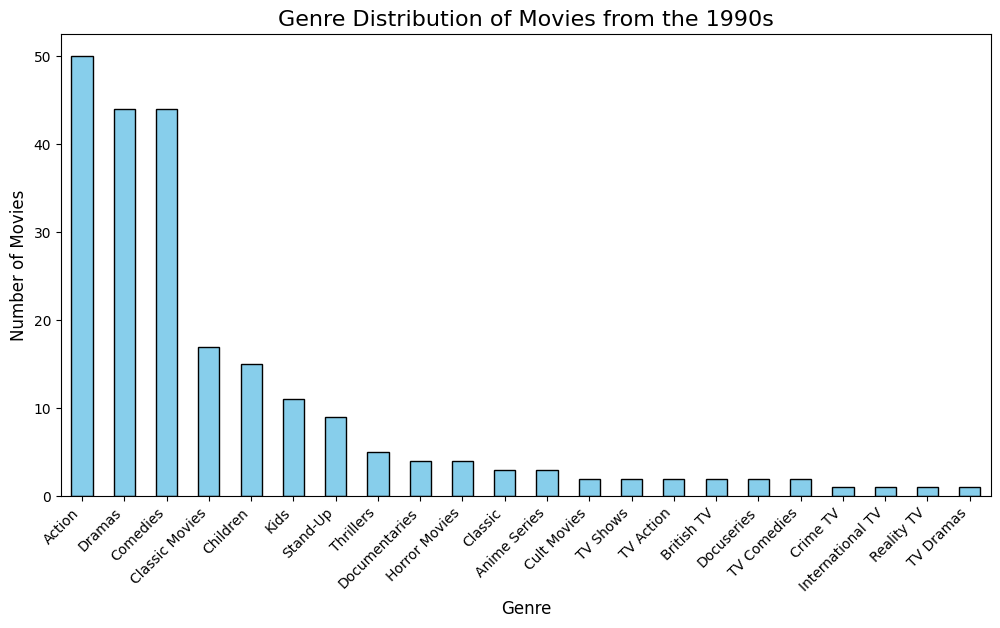

In [20]:
# Count the frequency of each genre in the 1990s movies
genre_counts = df_1990s['genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Genre Distribution of Movies from the 1990s', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()
# Count the frequency of each genre in the 1990s movies
genre_counts = df_1990s['genre'].value_counts()

# Plot the genre distribution
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Genre Distribution of Movies from the 1990s', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


Identify Movies with Multiple Genres

In [21]:
# Filter movies with multiple genres (assuming genres are separated by commas)
multiple_genres = df_1990s[df_1990s['genre'].str.contains(',', case=False)]

# Count how many movies have multiple genres
count_multiple_genres = multiple_genres.shape[0]

print(f"Number of movies with multiple genres: {count_multiple_genres}")


Number of movies with multiple genres: 0
